In [86]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

###Подготовка данных

In [8]:
index = dict()
with open('index.txt', 'r') as inputfile:
    for line in inputfile:
        linelist = line.strip().split()
        linereslist = []
        for i in xrange(1, len(linelist)):
            linereslist.append([int(linelist[i].split(':')[0]), int(linelist[i].split(':')[1])])
        index[int(linelist[0])] = linereslist

In [16]:
wordProbs = np.zeros((len(index),2), dtype=np.float64)

In [18]:
indexKeys = index.keys()
for i in xrange(len(indexKeys)):
    wordProbs[i][0] = indexKeys[i]
    for j in xrange(len(index[wordProbs[i][0]])):
        wordProbs[i][1] += index[wordProbs[i][0]][j][1]

In [20]:
wordProbs[:,1] /= np.sum(wordProbs[:,1])

In [29]:
wordProbsFin = dict()
for i in xrange(wordProbs.shape[0]):
    wordProbsFin[wordProbs[i][0]] = wordProbs[i][1]

In [37]:
docs = dict()
for i in indexKeys:
    for j in index[i]:
        if j[0] in docs:
            for k in xrange(j[1]):
                docs[j[0]].append(i)
        else:
            docs[j[0]] = []
            for k in xrange(j[1]):
                docs[j[0]].append(i)

In [47]:
docsProbs = np.zeros((len(docs), 2), dtype=np.float64)
docsKeys = docs.keys()
for i in xrange(len(docsKeys)):
    docsProbs[i][0] = docsKeys[i]
    for j in docs[docsKeys[i]]:
        docsProbs[i][1] += wordProbsFin[j]

In [49]:
docsProbs[:,1] /= np.sum(docsProbs[:,1])

In [54]:
docsProbsFin = sorted(docsProbs[:,1], key=lambda x: -x)

####Функции

In [62]:
def inducProb(B, docsProbsFin):
    return np.sum(docsProbsFin[:B])

In [63]:
def meanWorktime(A, B, N, docsProbsFin):
    return np.log(B) + (1 - inducProb(B, docsProbsFin)) * np.log(N - B) * A

In [181]:
def grid(stepsA, stepsB, docsProbsFin):
    N = len(docsProbsFin)
    avalues = [i+1 for i in xrange(stepsA)]
    stepsize = N / stepsB
    bvalues = [stepsize * (i + 1) for i in xrange(N / stepsize)]
    thetime = time()
    Z = np.zeros((len(avalues), len(bvalues)))
    for i in xrange(len(avalues)):
        for j in xrange(len(bvalues)):
            Z[i][j] = meanWorktime(avalues[i], bvalues[j], N, docsProbsFin)
    print time() - thetime
    X = np.zeros((len(avalues), len(bvalues)))
    X = np.dot(np.vstack(np.array(avalues)), np.ones((1, len(bvalues))))
    Y = np.zeros((len(avalues), len(bvalues)))
    Y = np.dot(np.ones((len(avalues), 1)), np.array(bvalues).reshape((1, len(bvalues))))
    return X, Y, Z

In [178]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [191]:
X, Y, Z = grid(1000, 100, docsProbsFin)

89.0474319458


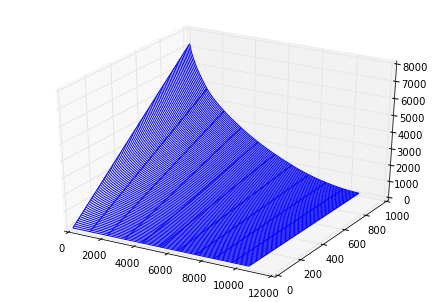

In [194]:
ax = Axes3D(plt.gcf())
ax.plot_wireframe(Y, X, Z, cstride=10, rstride=10)

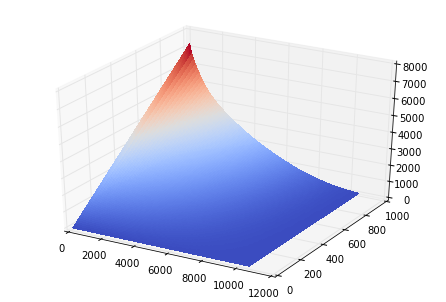

In [196]:
ax = Axes3D(plt.gcf())
ax.plot_surface(Y, X, Z, rstride=10, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

######Вывод: "Интересного" графика не бывает, все они строго монотонны
Вот график зависимости времени поиска от B с самым большим перепадом.

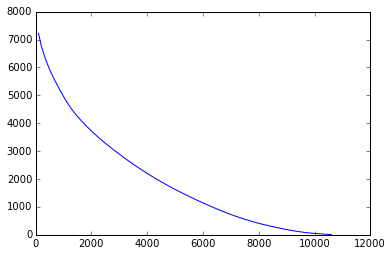

In [207]:
plt.plot(Y[0], Z[Z.shape[0]-1])